In [1]:

from google.colab import files
 
files.upload()  



Saving us-airlines-monthly-aircraft-miles-flown.csv to us-airlines-monthly-aircraft-miles-flown.csv


{'us-airlines-monthly-aircraft-miles-flown.csv': b'Month,MilesMM\r\n1963-01,6827\r\n1963-02,6178\r\n1963-03,7084\r\n1963-04,8162\r\n1963-05,8462\r\n1963-06,9644\r\n1963-07,10466\r\n1963-08,10748\r\n1963-09,9963\r\n1963-10,8194\r\n1963-11,6848\r\n1963-12,7027\r\n1964-01,7269\r\n1964-02,6775\r\n1964-03,7819\r\n1964-04,8371\r\n1964-05,9069\r\n1964-06,10248\r\n1964-07,11030\r\n1964-08,10882\r\n1964-09,10333\r\n1964-10,9109\r\n1964-11,7685\r\n1964-12,7602\r\n1965-01,8350\r\n1965-02,7829\r\n1965-03,8829\r\n1965-04,9948\r\n1965-05,10638\r\n1965-06,11253\r\n1965-07,11424\r\n1965-08,11391\r\n1965-09,10665\r\n1965-10,9396\r\n1965-11,7775\r\n1965-12,7933\r\n1966-01,8186\r\n1966-02,7444\r\n1966-03,8484\r\n1966-04,9864\r\n1966-05,10252\r\n1966-06,12282\r\n1966-07,11637\r\n1966-08,11577\r\n1966-09,12417\r\n1966-10,9637\r\n1966-11,8094\r\n1966-12,9280\r\n1967-01,8334\r\n1967-02,7899\r\n1967-03,9994\r\n1967-04,10078\r\n1967-05,10801\r\n1967-06,12950\r\n1967-07,12222\r\n1967-08,12246\r\n1967-09,13281\r

##Timeseries downsampling and upsampling data and forecasting with python

##daajt1

In [7]:
import pandas as pd



myles = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv" ,header=0,parse_dates=[0])

In [8]:
myles.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [13]:
quarterly_myles = myles.resample('Q', on='Month').mean()

quarterly_myles.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [15]:
yearly_miles = myles.resample('A',on='Month').sum()
yearly_miles.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


In [18]:
upsampĺedmiles = myles.resample('D',on='Month').mean()
upsampĺedmiles.head(30)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


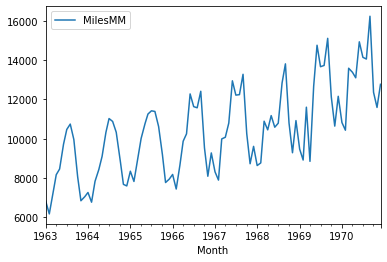

In [22]:
interpolated_myles = upsampĺedmiles.interpolate(method="linear")

interpolated_myles.plot()

In [23]:
interpolated_myles.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


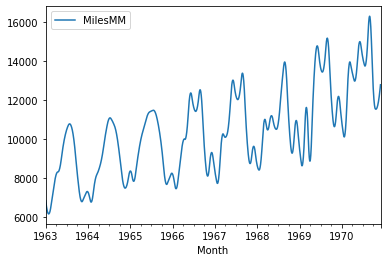

In [28]:
polinterpolated = upsampĺedmiles.interpolate(method="spline", order=2)
polinterpolated.plot()